In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

In [4]:
def balance_at_month(prinicipal_loan_amount,interest_rate,month,monthly_payment):
    P=prinicipal_loan_amount
    R=interest_rate
    m=month
    M=monthly_payment
    BR=(P*(1+R)**(m))+M*(1-(1+R)**m)/R
    return BR

In [5]:
def interest_principal_paid_at_month(principal_loan_amount,interest_rate,month,monthly_payment):
    IP=balance_at_month(principal_loan_amount,interest_rate,month-1,monthly_payment)*interest_rate
    P=monthly_payment-IP
    return IP,P

In [6]:
def tot_interest_principal_paid(principal_loan_amount,interest_rate,month,monthly_payment):
    x=np.arange(1,month+1)
    TOT_INTEREST=interest_principal_paid_at_month(principal_loan_amount,interest_rate,x,monthly_payment)[0].sum()
    TOT_PRINCIPAL=interest_principal_paid_at_month(principal_loan_amount,interest_rate,x,monthly_payment)[1].sum()
    return TOT_INTEREST, TOT_PRINCIPAL

In [7]:
def mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,year):
    P=home_price-down_payment #Principal loan amount
    R=interest_rate/100/12 #Monthly interest rate
    T=term_of_loan_years*12 #Term of loan in months
    
    #Numerator of monthly repayment formula
    M_n=R*P*((1+R)**T)
    
    #Denominator of monthly repayment formula
    M_d=(1+R)**T-1
    
    M=M_n/M_d #Monthly repayments
    
    TI=M*T-P #Total interest paid over term of loan

    ##Outputs as a function of years##

    #Balance Remaining
    BR=balance_at_month(P,R,year*12,M)


    #Interest paid at year

    Interest, Principal = tot_interest_principal_paid(P,R,year*12,M)


    #Yearly total interest paid
    #Yearly principal paid
    
    return M, TI, BR, Interest, Principal 

In [74]:
def amoritization_table(interest_rate,term_of_loan_years,home_price,down_payment,app):
    p_interest=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[3]
    p_principal=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[4]
    p_balance=lambda x: mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,x)[2]
    M=mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,1)[0]
    TI=mortgage_calc(interest_rate,term_of_loan_years,home_price,down_payment,1)[1]
    x_interest=[]
    x_principal=[]
    x_balance=[]
    fc=[]
    sel=[]
    rent=[]
    inter=[]
    tr=term_of_loan_years+1
    for x in np.arange(0,tr):
        x_interest_new=p_interest(x)
        x_interest.append(x_interest_new)
        x_principal_new=p_principal(x)
        x_principal.append(x_principal_new)
        x_balance_new=p_balance(x)
        x_balance.append(x_balance_new)
        
        prop_taxes=0.013
        selling_agent_fees=0.06
        closing_fees=6000
        
        fcn=prop_taxes*home_price*(app**x)*x+selling_agent_fees*home_price*(app**x)+closing_fees
            
        seln=home_price*(app**x) - x_balance_new - down_payment - fcn\
        - x_interest_new - x_principal_new + (tot_interest_principal_paid(home_price-down_payment,\
                                                                         interest_rate/12/100,x*12,M)[0]-
                                              tot_interest_principal_paid(home_price-down_payment,\
                                                                         interest_rate/12/100,(x-1)*12,M)[0])*0.22
        intern=tot_interest_principal_paid(home_price-down_payment,interest_rate/12/100,x*12,M)[0]-\
        tot_interest_principal_paid(home_price-down_payment,interest_rate/12/100,(x-1)*12,M)[0]
        inter.append(intern)
        
        sel.append(seln)
        
        rent_n=-1500*12*x
        rent.append(rent_n)
            
    
    fig, ax = py.subplots(figsize=(12,8))
    py.xticks(np.arange(0,tr))
    inc=20000
    py.yticks(np.arange(-1500*12*tr,home_price-down_payment+inc,inc))
    py.grid()
    ax.plot(np.arange(0,tr),x_interest,'b',label='Interest Paid')
    ax.plot(np.arange(0,tr),x_principal,'r',label='Principal Paid')
    ax.plot(np.arange(0,tr),x_balance,'g',label='Balance Remaining')
    ax.plot(np.arange(0,tr),sel,'orange',label='Home Purchase')
    ax.plot(np.arange(0,tr),rent,'black',label='Rent')
    
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
    py.tight_layout()
    at=pd.DataFrame({'Years':np.arange(0,tr),'balance':np.round(x_balance,2),'total_interest_paid':np.round(x_interest,2),\
                     'total_principal_paid':np.round(x_principal,2),'interest_in_year':np.round(inter,2),\
                     'profit':np.round(sel,2),'rent':rent})
    #print(at)
    print("Total Interest Paid = {}".format(TI))
    print("Monthly Repayment = {}".format(M))
    return at

In [119]:
1590/5700

0.2789473684210526

Total Interest Paid = 71259.22721078282
Monthly Repayment = 1590.3290400599044


,Years,balance,total_interest_paid,total_principal_paid,interest_in_year,profit,rent
0,0,215000.00,0.00,0.00,0.00,-22200.00,0
1,1,204321.69,8405.64,10678.31,8405.64,-32266.40,-18000
2,2,193208.34,16376.23,21791.66,7970.59,-43842.70,-36000
3,3,181642.21,23894.05,33357.79,7517.82,-54970.13,-54000
4,4,169604.85,30940.65,45395.15,7046.59,-65630.39,-72000
5,5,157077.08,37496.82,57922.92,6556.17,-75804.46,-90000
6,6,144038.90,43542.59,70961.10,6045.77,-85472.52,-108000
7,7,130469.53,49057.17,84530.47,5514.58,-94613.96,-126000
8,8,116347.32,54018.91,98652.68,4961.74,-103207.33,-144000
9,9,101649.76,58405.29,113350.24,4386.38,-111230.29,-162000


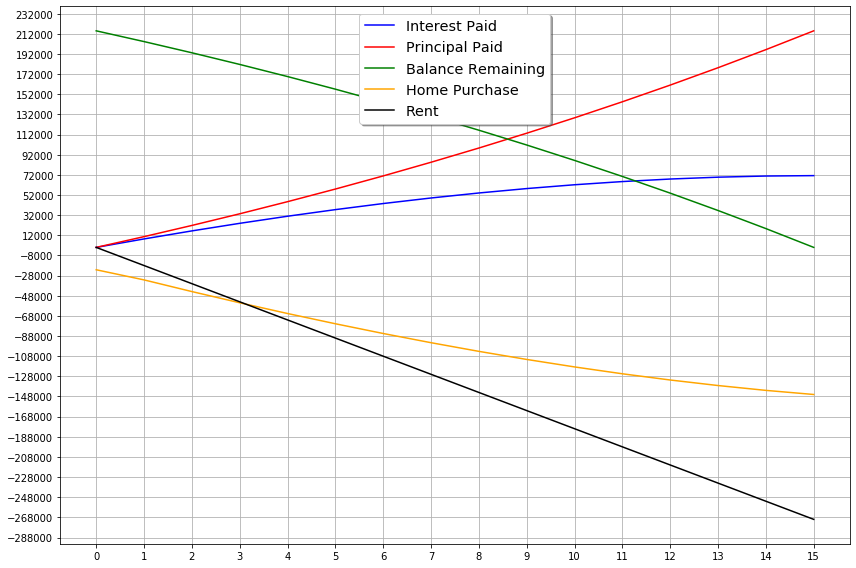

In [121]:
amoritization_table(4,15,270000,55000,1.0)